
# 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

자, 이제 여러분이 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아볼 차례입니다.

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아닙니다.  
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있습니다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는  **EDA**  과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요합니다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있습니다.

오늘은 이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 마세요!

## 튜닝해볼 수 있는 모델 클래스 인자

대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

-   `max_depth`  : 의사 결정 나무의 깊이, 정수 사용

-   `learning_rate`  : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용

-   `n_estimators`  : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용

-   `num_leaves`  : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수

-   `boosting_type`  : 부스팅 방식,  `gbdt`,  `rf`  등의 문자열 입력

위에서 저는  `n_estimators`와  `max_depth`  에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.  
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

-   [lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
-   [Chapter 4. 분류 - LightGBM](https://injo.tistory.com/48)

위의 자료 외에도  `lightgbm, xgboost 하이퍼 파라미터 튜닝`  키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던  `my_GridSearch()`,  `save_submission()`  등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

## 시도해볼 수 있는 방법

여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

-   기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)

-   LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기

-   다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기

-   Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!  
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

-   [https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks)

아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.
***

## 필요라이브러리 가져오기

In [1]:
import matplotlib.pyplot as plt

# 시각화한 그림을 실행한 브라우저에서 바로 볼 수 있게 해주는 코드
%matplotlib inline

# 시각화 하고자하는 래프를 더 높은 해상도로 출력해주는 코드
%config InlineBackend.figure_format = 'retina'

# 경고 메세지의 출력을 관리하는 라이브러리
import warnings

# 경고 메세지를 무시하고, 숨기기 위한 코드
warnings.filterwarnings("ignore")

import os
# 코드 내에서 디렉토리 경로를 직접 다루기 위한 라이브러리
from os.path import join

import pandas as pd
import numpy as np

# 결측치 시각화를 위한 라이브러리
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

## Baseline 만들기

In [3]:
# 날짜 컬럼을 년 월 형태로 변경
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
# 불필요한 id 컬럼 삭제
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
# test 데이터 전처리

# 날짜 컬럼 변경 및 id 컬럼 삭제
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


<AxesSubplot:xlabel='price', ylabel='Density'>

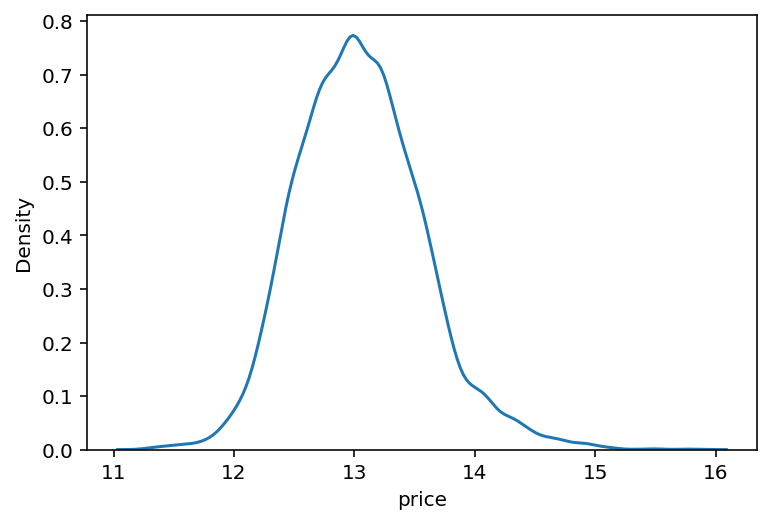

In [7]:
# 로그변환을 통해 편향 조절

y = np.log1p(y)


# 시각화를 통해 편향 조절 확인
sns.kdeplot(y)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 모델 설계

In [9]:
# RMSE 를 계산하기위한 함수

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [10]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값. 
# random_state=None    # 이게 초기값. 
# 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택.  

# 하지만 우리는 이렇게 고정값을 세팅.
random_state = 2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [11]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [12]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [13]:
# 위 2과정을 `get_scores(models, train, y)` 함수로 생성

def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df
      
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


In [14]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

In [15]:
# param_grid에 탐색할 xgboost 관련 하이퍼 파라미터를 넣어서 준비

param_grid = {'learning_rate' : [0.0001, 0.1],
              'n_estimators': [50, 100],
              'max_depth': [1, 10],
              'num_leaves' : [31],
              'boosting_type' : ["gbdt"]}

In [16]:
# 모델 준비
# 모델은 LightGBM(lgbm) 을 사용

model = LGBMRegressor(random_state=random_state)

In [17]:
# model, param_grid와 함께 다른 여러 가지 인자를 넣어서 GridSearchCV를 수행

grid_model = GridSearchCV(model, param_grid=param_grid, 
                        scoring='neg_mean_squared_error', 
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:    1.7s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.0001, 0.1], 'max_depth': [1, 10],
                         'n_estimators': [50, 100], 'num_leaves': [31]},
             scoring='neg_mean_squared_error', verbose=1)

In [18]:
grid_model.cv_results_

{'mean_fit_time': array([0.0627811 , 0.06328783, 0.13709512, 0.22903409, 0.04915519,
        0.06375279, 0.11681876, 0.19696445]),
 'std_fit_time': array([0.01225605, 0.00560861, 0.00915887, 0.0083472 , 0.00292137,
        0.0037927 , 0.00781293, 0.01028974]),
 'mean_score_time': array([0.00451431, 0.00522571, 0.00619292, 0.00921178, 0.00422158,
        0.00568733, 0.00839767, 0.01530857]),
 'std_score_time': array([0.00091149, 0.00029436, 0.00019707, 0.00089805, 0.00030445,
        0.00052869, 0.00086914, 0.00072838]),
 'param_boosting_type': masked_array(data=['gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt',
                    'gbdt'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.0001, 0.0001, 0.0001, 0.0001, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=o

In [19]:
# 필요 정보만을 빼오기
# params에는 각 파라미터의 조합이 있다.

params = grid_model.cv_results_['params']
params

[{'boosting_type': 'gbdt',
  'learning_rate': 0.0001,
  'max_depth': 1,
  'n_estimators': 50,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.0001,
  'max_depth': 1,
  'n_estimators': 100,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.0001,
  'max_depth': 10,
  'n_estimators': 50,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.0001,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': 1,
  'n_estimators': 50,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': 1,
  'n_estimators': 100,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 50,
  'num_leaves': 31},
 {'boosting_type': 'gbdt',
  'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 31}]

In [20]:
# score에는 각 조합에 대한 점수가 있다.

score = grid_model.cv_results_['mean_test_score']
score

array([-0.27766441, -0.27675098, -0.27644155, -0.27431766, -0.07339447,
       -0.05502043, -0.02917734, -0.02702714])

In [21]:
results = pd.DataFrame(params)
results['score'] = score

results

,boosting_type,learning_rate,max_depth,n_estimators,num_leaves,score
0,gbdt,0.0001,1,50,31,-0.277664
1,gbdt,0.0001,1,100,31,-0.276751
2,gbdt,0.0001,10,50,31,-0.276442
3,gbdt,0.0001,10,100,31,-0.274318
4,gbdt,0.1000,1,50,31,-0.073394
5,gbdt,0.1000,1,100,31,-0.055020
6,gbdt,0.1000,10,50,31,-0.029177
7,gbdt,0.1000,10,100,31,-0.027027


In [22]:
# RMSE 값으로 변환

results['RMSE'] = np.sqrt(-1 * results['score'])
results

,boosting_type,learning_rate,max_depth,n_estimators,num_leaves,score,RMSE
0,gbdt,0.0001,1,50,31,-0.277664,0.526939
1,gbdt,0.0001,1,100,31,-0.276751,0.526071
2,gbdt,0.0001,10,50,31,-0.276442,0.525777
3,gbdt,0.0001,10,100,31,-0.274318,0.523753
4,gbdt,0.1000,1,50,31,-0.073394,0.270914
5,gbdt,0.1000,1,100,31,-0.055020,0.234564
6,gbdt,0.1000,10,50,31,-0.029177,0.170814
7,gbdt,0.1000,10,100,31,-0.027027,0.164399


In [23]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,boosting_type,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
0,gbdt,0.0001,1,50,31,-0.277664,0.526939
1,gbdt,0.0001,1,100,31,-0.276751,0.526071
2,gbdt,0.0001,10,50,31,-0.276442,0.525777
3,gbdt,0.0001,10,100,31,-0.274318,0.523753
4,gbdt,0.1000,1,50,31,-0.073394,0.270914
5,gbdt,0.1000,1,100,31,-0.055020,0.234564
6,gbdt,0.1000,10,50,31,-0.029177,0.170814
7,gbdt,0.1000,10,100,31,-0.027027,0.164399


In [24]:
# 위의 표를 `RMSLE`가 낮은 순서대로 정렬.

results = results.sort_values('RMSLE')
results

,boosting_type,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
7,gbdt,0.1000,10,100,31,-0.027027,0.164399
6,gbdt,0.1000,10,50,31,-0.029177,0.170814
5,gbdt,0.1000,1,100,31,-0.055020,0.234564
4,gbdt,0.1000,1,50,31,-0.073394,0.270914
3,gbdt,0.0001,10,100,31,-0.274318,0.523753
2,gbdt,0.0001,10,50,31,-0.276442,0.525777
1,gbdt,0.0001,1,100,31,-0.276751,0.526071
0,gbdt,0.0001,1,50,31,-0.277664,0.526939


In [25]:
# 위의 그리트 탐색 및 결과까지 확인하는 과정을 하나로 정리

"""
다음과 같은 과정을 진행할 수 있는 
`my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현

1. GridSearchCV 모델로 `model`을 초기화.
2. 모델을 fitting .
3. params, score에 각 조합에 대한 결과를 저장. 
4. 데이터 프레임을 생성하고, 
   RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환.
"""


def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [26]:
model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:    1.2s finished


,boosting_type,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
7,gbdt,0.1000,10,100,31,-0.027027,0.164399
6,gbdt,0.1000,10,50,31,-0.029177,0.170814
5,gbdt,0.1000,1,100,31,-0.055020,0.234564
4,gbdt,0.1000,1,50,31,-0.073394,0.270914
3,gbdt,0.0001,10,100,31,-0.274318,0.523753
2,gbdt,0.0001,10,50,31,-0.276442,0.525777
1,gbdt,0.0001,1,100,31,-0.276751,0.526071
0,gbdt,0.0001,1,50,31,-0.277664,0.526939


In [27]:
# 위에서 말한 하이퍼 파라미더로 구성된 모델 준비

model = LGBMRegressor(max_depth=-1, n_estimators=100, boosting_type="gbdt", learning_rate=0.015, num_leaves=31, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.07709778, 12.94125619, 13.86695792, ..., 13.0056779 ,
       12.88229491, 13.01000279])

In [28]:
# 로그 변환된 예측 결과를 다시 반환
# np.expm1() 을 활용

prediction = np.expm1(prediction)
prediction

array([ 477870.80239797,  417171.96091856, 1052792.76477505, ...,
        444931.51561068,  393286.00405025,  446859.96906102])

In [29]:
# sample_submission.csv 파일을 가져오기

data_dir = os.getenv('HOME')+'/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [30]:
# 새롭게 예측한 값 덮어 씌우기

submission['price'] = prediction
submission.head()

,id,price
0,15035,4.778708e+05
1,15036,4.171720e+05
2,15037,1.052793e+06
3,15038,3.369668e+05
4,15039,3.342431e+05


In [31]:
# csv 파일로 저장
# 파일 이름에 모델의 종류와 
# 위에서 확인했던 RMSLE 값을 넣어주면 제출 파일들이 깔끔하게 관리

submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/home/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv
